<h1 style="color:blue;text-align:center">Sheet III</h1>
<h2 style="color:blue;text-align:center">Descriptive Statistics - Frequency Tables and
Distributions</h2>

<h3 style="color:green;text-align:center">Exercise 1</h3>

Consider the results of the national elections in Germany in 2013 and
2017:


| Party | Results 2013 (%) |Results 2017 (%)|
|-------|------------------|----------------|
| CDU | 26,8% |34,1%|
| SPD | 20,5% | 25,7% |
| AfD | 12,6% | 4,7% |
| FDP | 10,7% | 4,8% |
| DIE LINKE | 9,2% | 8,6% |
| GRUENE | 8,9% | 8,4% |
| CSU | 6,2% | 7,4% |
| Others | 5,0% | 6,2% |

Summarize the results of 2017 in a pie and abar chart. Compare the
results in 2013 and 2017 with an appropriate bar chart.

**Answer**: The table shows the relative frequencies of each party. We
can draw a pie chart and a barplot with the parties on the x-axis and the
relative frequencies on the y-axis. To compare the ersults in 2013 and
in 2017 we can show the differences in proportion of votes in barplot.

In [1]:
install.packages("dplyr")
library("dplyr")

Installing package into ‘/home/jrana/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df <- tibble (
res_2013 = c ( 0.268 , 0.205 , 0.126 , 0.107 , 0.092 
    , 0.089 ,0.062 , 0.05 ) ,
res_2017= c ( 0.341 , 0.257 , 0.047 , 0.048 , 0.086 
             , 0.084 , 0.074 , 0.062 ) ,
diff=res_2017-res_2013,    
party = c ( "CDU" , "SPD" ,"AFD" , "FDP" , 
           "Die Linke" , "Gruene" , "CSU" , "Others" ) ,
)
df

res_2013,res_2017,diff,party
<dbl>,<dbl>,<dbl>,<chr>
0.268,0.341,0.073,CDU
0.205,0.257,0.052,SPD
0.126,0.047,-0.079,AFD
0.107,0.048,-0.059,FDP
0.092,0.086,-0.006,Die Linke
0.089,0.084,-0.005,Gruene
0.062,0.074,0.012,CSU
0.050,0.062,0.012,Others


## pie chart

In [4]:
par(mar=c(2,2,0.5,0.5),mfrow=c(3,1),cex=.45)

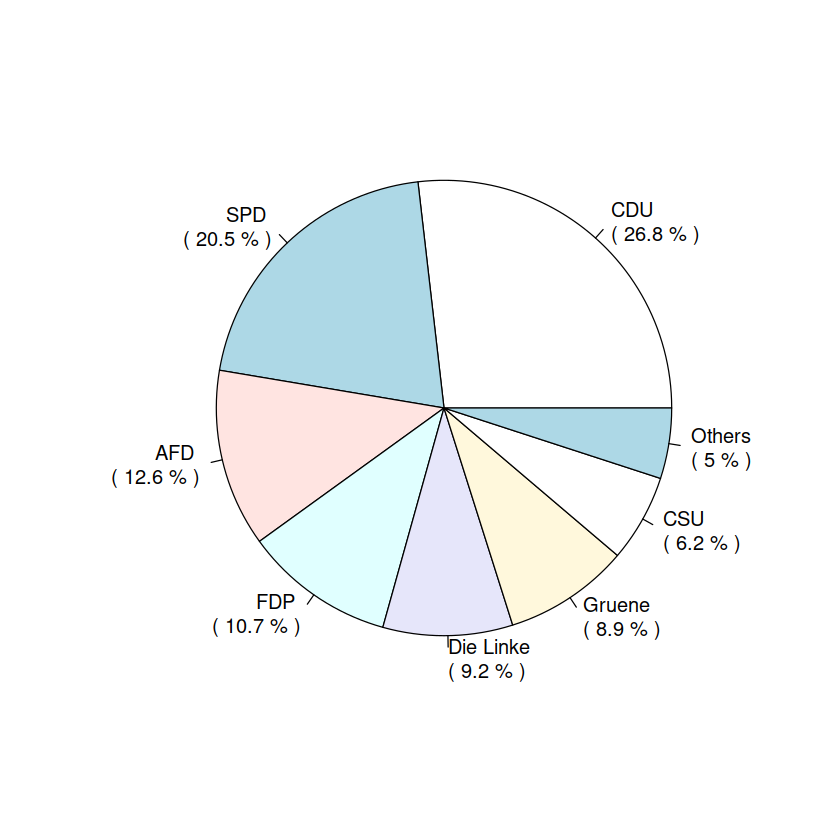

In [5]:
pie(df$res_2013,labels = paste(df$party,"
(",df$res_2013*100,"%",")"))

## barplot

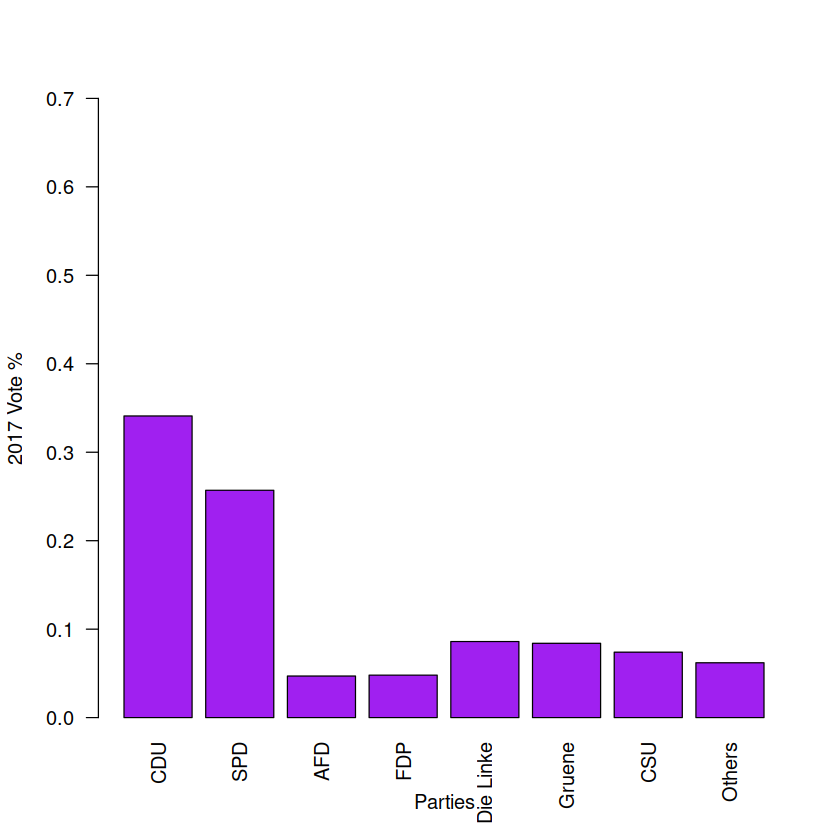

In [6]:
barplot(df$res_2017,names.arg=df$party,
       ylim=c(0,0.7),xlab="Parties",ylab="2017 Vote %"
       ,las=2,col="purple"
       )

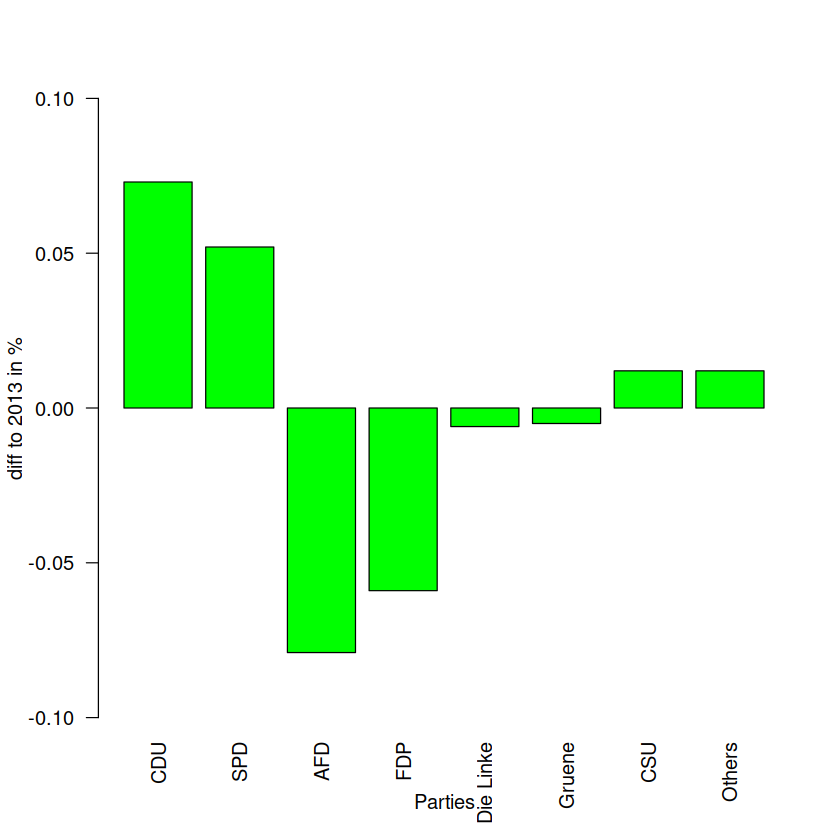

In [7]:
barplot(df$diff,names.arg=df$party,
       ylim=c(-0.1,0.1),xlab="Parties",
        ylab="diff to 2013 in %"
       ,las=2,col="green"
       )

<h3 style="color:green;text-align:center">Exercise 2</h3>

he data shown in the list are the times in milliseconds it took one of
us to move the mouse over a small target in a series of 20 trials. The
times are sorted from shortest to longest.
568, 577, 581, 640, 641, 645, 657, 673, 696, 703, 720, 728, 729, 777, 808,
824, 825, 865, 875, 1007

In [8]:
df<-tibble(vals=c(568, 577, 581, 640, 641, 645, 657, 673, 696, 703, 720, 728, 729, 777, 808,
824, 825, 865, 875, 1007))
df %>% slice(1:5)

vals
<dbl>
568
577
581
640
641


+ (a) Compute and draw the cumulative frequency distribution.

In [9]:
df %>% count(vals) %>% ## count(vals) -> first group_by vals and then find count
    mutate(
        abs.freq=n,
        rel.freq=abs.freq/nrow(df),
        cum.rel.freq=cumsum(rel.freq)
          ) %>% select(-n)

vals,abs.freq,rel.freq,cum.rel.freq
<dbl>,<int>,<dbl>,<dbl>
568,1,0.05,0.05
577,1,0.05,0.10
581,1,0.05,0.15
640,1,0.05,0.20
641,1,0.05,0.25
645,1,0.05,0.30
657,1,0.05,0.35
673,1,0.05,0.40
696,1,0.05,0.45


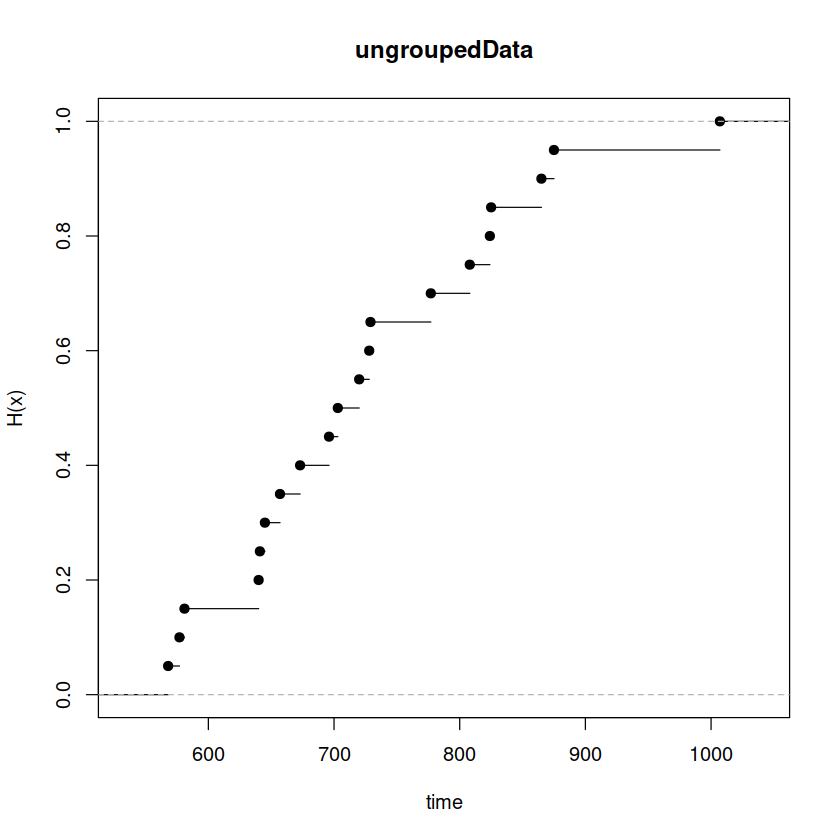

In [10]:
plot.ecdf(df$vals,xlab="time",ylab="H(x)",main="ungroupedData")

+ Compute and draw the cumulative frequency distribution.

In [11]:
H<-ecdf(df$vals) # ecdf=Empirical Cumulative Distribution Function
print(H)

Empirical CDF 
Call: ecdf(df$vals)
 x[1:20] =    568,    577,    581,  ...,    875,   1007


In [12]:
H(800) # less equal 800

[1] 0.7

In [12]:
 1-H(725) # greater than 725

[1] 0.45

In [13]:
H(777)-H(642) #>642, <=777

[1] 0.45

In [14]:
H(696) - H(695) ## equal to 696

[1] 0.05

### grouped data

In [15]:
length(df$vals)

[1] 20

+ Consider the following classes (500, 600], (600, 700], (700, 800],
  (800, 900], (900, 1000], (1000, 1100].
   + Compute the grouped frequency distribution and draw the
      histogram and the distribution function.

In [17]:
bounds<-c(500,600,700,800,900,1000,1100)
classes=c("class1(500-600)","class2(600-700)","class3(700-800)","class4(800-900)",
 "class5(900-1000)","class6(1000-1100)")
cut(df$vals,breaks=bounds,labels = classes) %>% as_tibble() %>%
     count(value) %>%
     mutate(abs.freq=n)  %>% unique() %>%
     mutate(rel.freq=abs.freq/sum(abs.freq),cum.rel.freq=cumsum(rel.freq)) %>% select(-n)

value,abs.freq,rel.freq,cum.rel.freq
<fct>,<int>,<dbl>,<dbl>
class1(500-600),3,0.15,0.15
class2(600-700),6,0.30,0.45
class3(700-800),5,0.25,0.70
class4(800-900),5,0.25,0.95
class6(1000-1100),1,0.05,1.00


### histogram

In [20]:
grouped_data<-cut(df$vals,breaks=bounds,labels = classes) %>% as_tibble() %>%
     count(value)
grouped_data

value,n
<fct>,<int>
class1(500-600),3
class2(600-700),6
class3(700-800),5
class4(800-900),5
class6(1000-1100),1


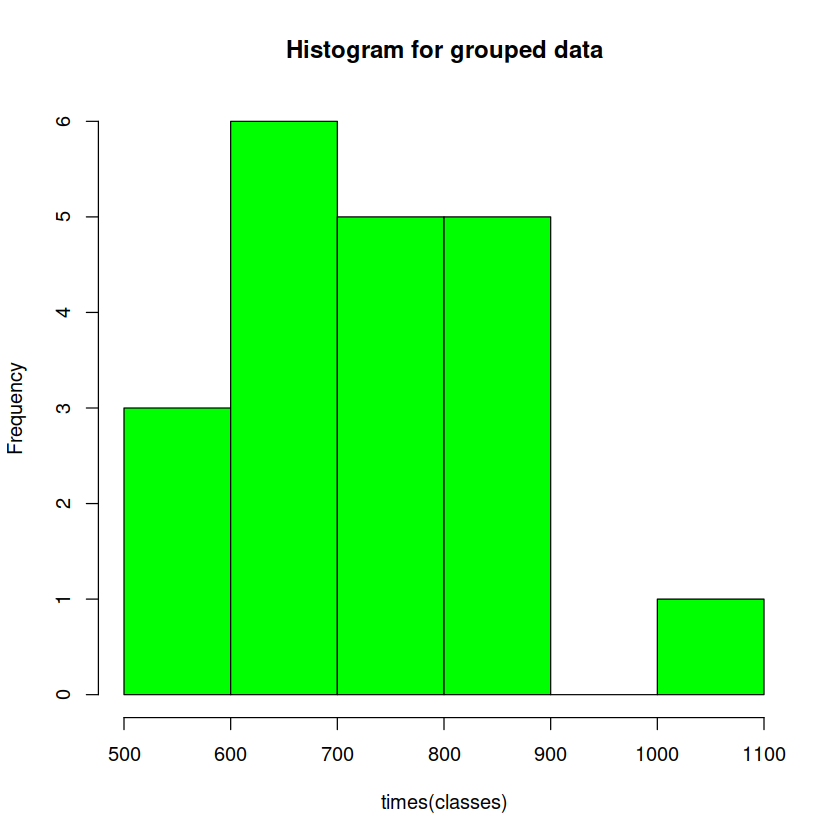

In [18]:
hist(df$vals,breaks=bounds,xlab="times(classes)",main="Histogram for grouped data",col="green")

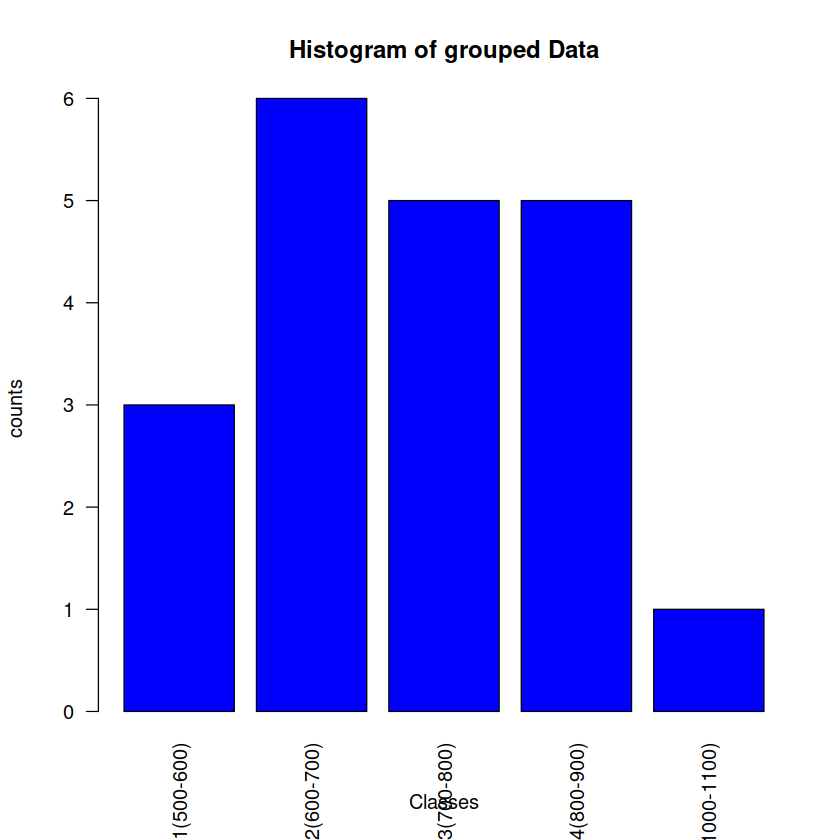

In [21]:
his<-barplot(height=grouped_data$n,names.arg=grouped_data$value,las=2,col="blue",
       main="Histogram of grouped Data",
       xlab="Classes",
       ylab="counts"
       )
#text(his, grouped_data$n, 
 #    labels = grouped_data$n, pos = 3, cex = 0.8, col = "black")


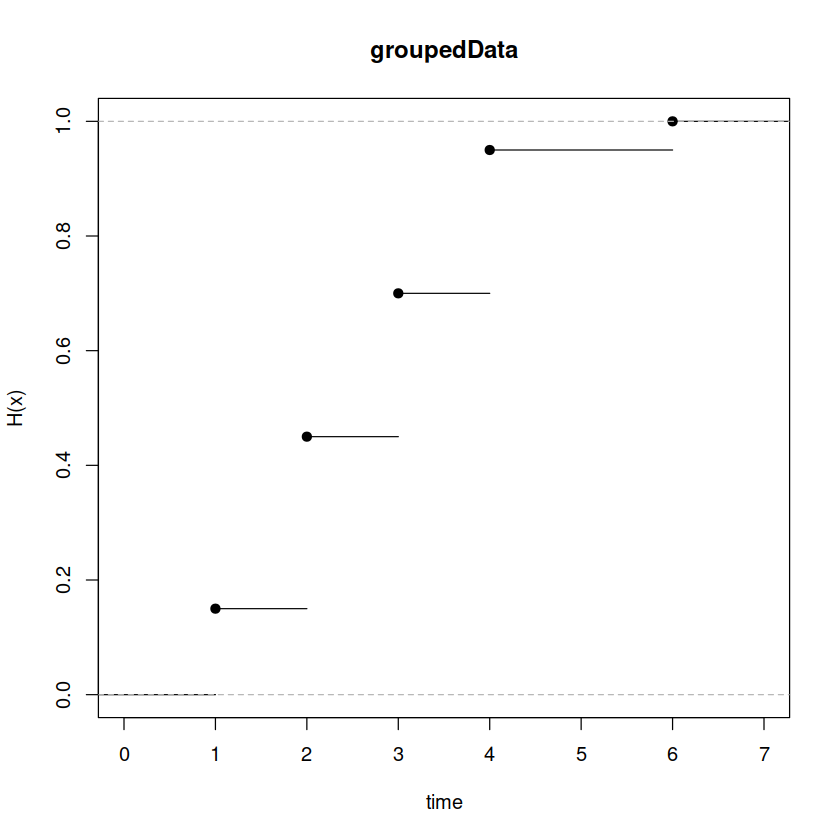

In [22]:
plot.ecdf(cut(df$vals,breaks=bounds,labels=bounds[-1]) %>% as.integer(),
          xlab="time",ylab="H(x)",main="groupedData")

In [23]:
cut_times<-cut(df$vals,breaks=bounds,labels=bounds[-1])

cut_times

[1] 600  600  600  700  700  700  700  700  700  800  800  800  800  800  900 
[16] 900  900  900  900  1100
Levels: 600 700 800 900 1000 1100

In [24]:
tibble(upper_bound=cut_times %>% as.character() %>% as.numeric()) %>%
   count(upper_bound) %>% mutate(rel.freq=n/length(cut_times)) %>% 
     mutate(cum.rel.freq=cumsum(rel.freq))

upper_bound,n,rel.freq,cum.rel.freq
<dbl>,<int>,<dbl>,<dbl>
600,3,0.15,0.15
700,6,0.30,0.45
800,5,0.25,0.70
900,5,0.25,0.95
1100,1,0.05,1.00


+ The classes are now (500, 600], (600, 900],(1000, 1200]. Mention
  that the classes have different width. Compute the grouped fre-
  quency distribution and draw the histogram. Can you interpret
  the y-values in the diagram? Draw the distribution function, too.

In [25]:
bounds<-c(500,600,900,1000,1200)

cut(df$vals,breaks=bounds,labels=c("class1","class2","class3","class4")) %>% as_tibble() %>%
     count(value) %>%
     mutate(abs.freq=n)  %>% unique() %>%
     mutate(rel.freq=abs.freq/sum(abs.freq),cum.rel.freq=cumsum(rel.freq)) %>% select(-n)

value,abs.freq,rel.freq,cum.rel.freq
<fct>,<int>,<dbl>,<dbl>
class1,3,0.15,0.15
class2,16,0.80,0.95
class4,1,0.05,1.00


In [26]:
grouped_data<-cut(df$vals,breaks=bounds,labels=c("class1","class2","class3","class4")) %>% as_tibble() %>%
     count(value)
grouped_data

value,n
<fct>,<int>
class1,3
class2,16
class4,1


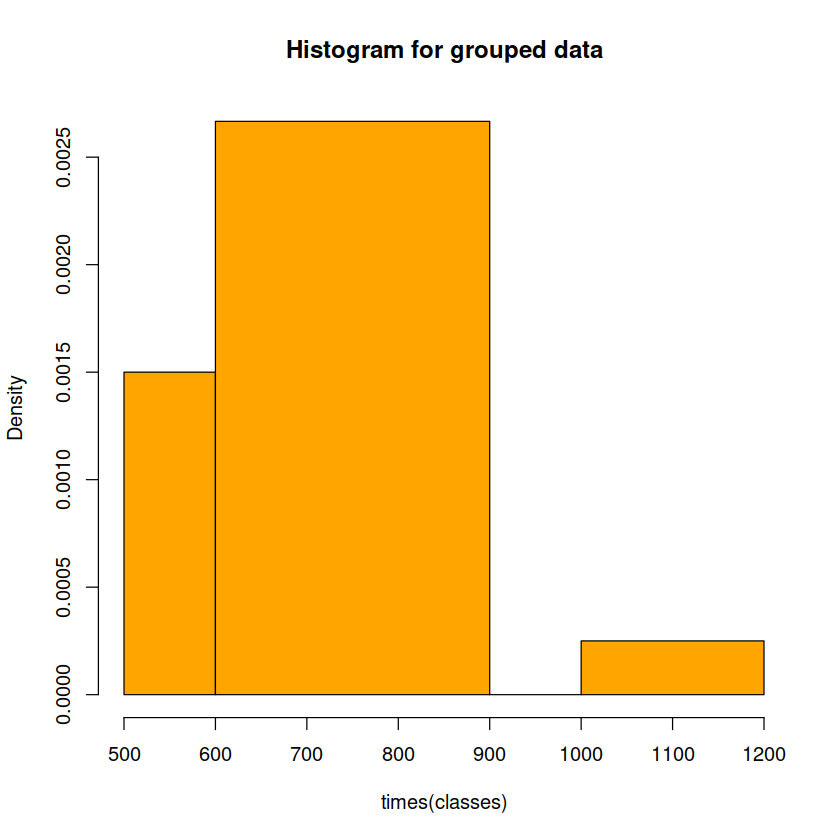

In [27]:
hist(df$vals,breaks=bounds,xlab="times(classes)",main="Histogram for grouped data",col="orange")

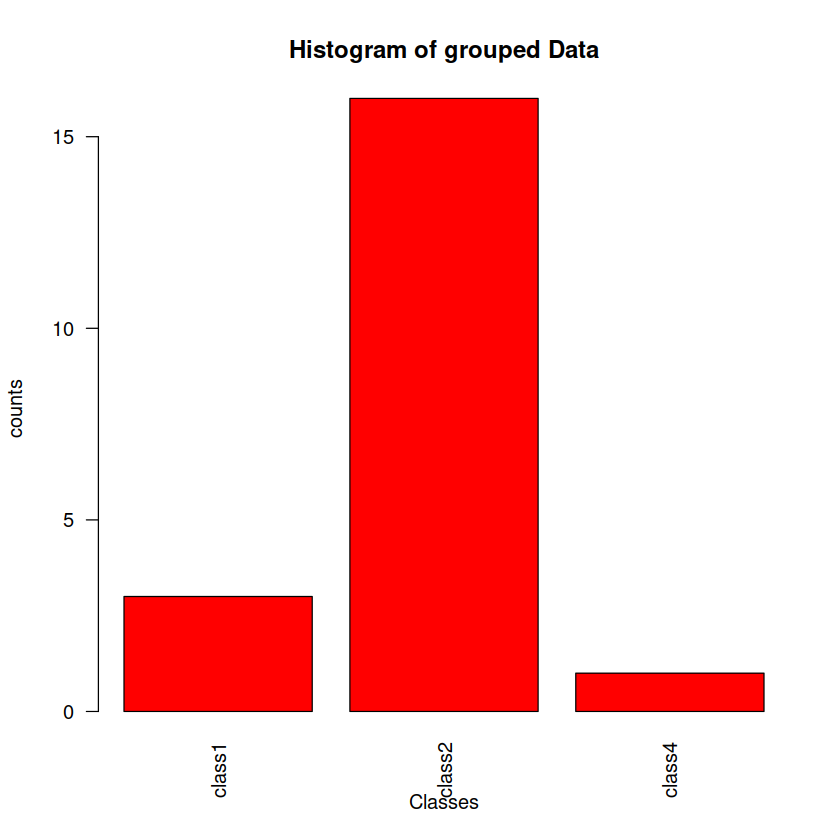

In [28]:
his<-barplot(height=grouped_data$n,names.arg=grouped_data$value,las=2,col="red",
       main="Histogram of grouped Data",
       xlab="Classes",
       ylab="counts")

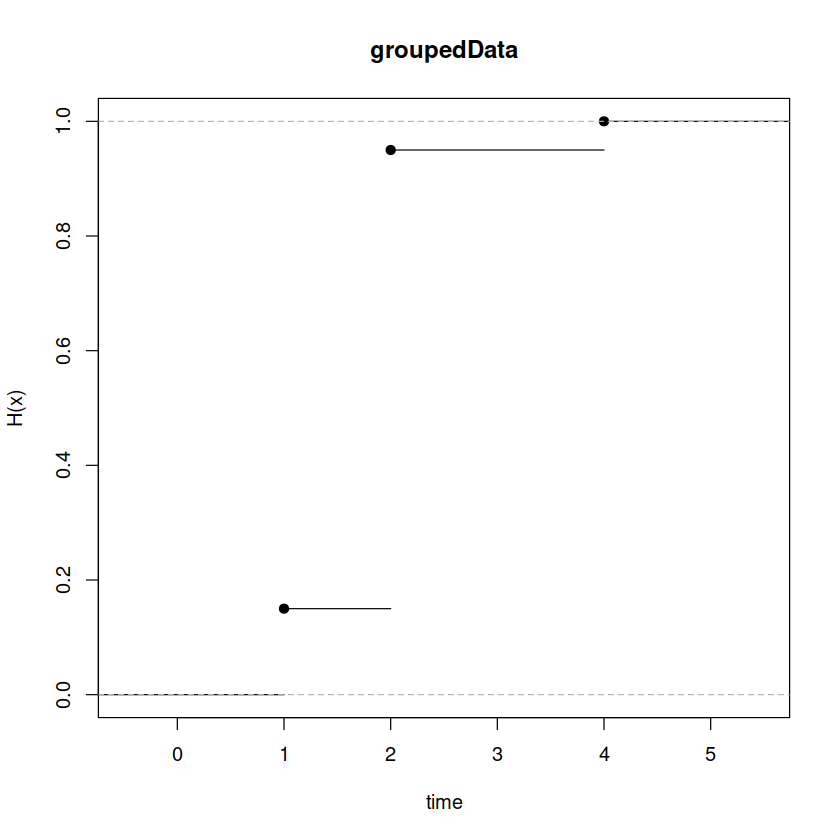

In [29]:
plot.ecdf(cut(df$vals,breaks=bounds,labels=bounds[-1]) %>% as.integer(),
          xlab="time",ylab="H(x)",main="groupedData")

## Descriptive Statistics - Measures

<h3 style="color:green;text-align:center">Exercise 1</h3>

#### Make up data sets with 5 numbers each that have:
 +  the same mean but different standard deviations.

In [43]:
myfun<-function(){
    
    s1<-sample(x = 1:10,size=5,replace=T)
    s2<-sample(x = 1:10,size=5,replace=T)

    while(T){
        if(mean(s1)==mean(s2) && sd(s1)!=sd(s2)){
          return(c(s1,s2))  
        }
        s1<-sample(x = 1:10,size=5,replace=T)
        s2<-sample(x = 1:10,size=5,replace=T)
    }
    
}

In [44]:
res<-myfun()
res

[1] 10  1  3  5  9  9  8  3  6  2

In [45]:
res[1:5] %>% mean()

[1] 5.6

In [42]:
res[1:5]

[1] 2 6 9 4 9

In [46]:
res[6:10] %>% mean()

[1] 5.6

In [47]:
res[6:10] %>% sd()

[1] 3.04959

In [48]:
res[1:5] %>% sd()

[1] 3.847077

+ the same mean but different medians.


In [49]:
myfun<-function(){
    
    s1<-sample(x = 1:10,size=5,replace=T)
    s2<-sample(x = 1:10,size=5,replace=T)

    while(T){
        if(mean(s1)==mean(s2) && median(s1)!=median(s2)){
          return(c(s1,s2))  
        }
        s1<-sample(x = 1:10,size=5,replace=T)
        s2<-sample(x = 1:10,size=5,replace=T)
    }
    
}

In [50]:
res<-myfun()
res

[1]  9  2 10  3  3 10  1  2  7  7

In [51]:
res[6:10] %>% mean()

[1] 5.4

In [52]:
res[1:5] %>% mean()

[1] 5.4

In [53]:
res[6:10] %>% median()

[1] 7

In [54]:
res[1:5] %>% median()

[1] 3

<h3 style="color:green;text-align:center">Exercise 2</h3>


 $$\text{geometric mean:} \sqrt[\leftroot{20} \uproot{5} n]{\prod_{i=1}^n}x_i$$

Consider a stock portfolio that began with a value of 1000 $ and had
annual returns of 13%, 22%, 12%, -5%, and -13%.

+ Compute the value after each of the five years.

In [60]:
annual_ret<-c(0.13,0.22,0.12,-0.05,-0.13)
df<-tibble(year=1:5,annual_ret=annual_ret)
df

year,annual_ret
<int>,<dbl>
1,0.13
2,0.22
3,0.12
4,-0.05
5,-0.13


In [76]:
df %>% mutate(rate=1+annual_ret) %>% mutate(value=1000*cumprod(1+annual_ret)) ->tmp
tmp

year,annual_ret,rate,value
<int>,<dbl>,<dbl>,<dbl>
1,0.13,1.13,1130.000
2,0.22,1.22,1378.600
3,0.12,1.12,1544.032
4,-0.05,0.95,1466.830
5,-0.13,0.87,1276.142


In [68]:
## after first 5 years value:
1000*1.13


[1] 1130

In [72]:
1000 + 1000*(13/100)

[1] 1130

In [73]:
1130 + 1130*(22/100)

[1] 1378.6

In [69]:
## after second 5 years value:
1130*1.22

[1] 1378.6

In [71]:
## after third 5 years value:
1378.6*1.12

[1] 1544.032

In [74]:
1/5

[1] 0.2

+ Compute the annual rate of return

In [80]:
# annual rate of return = (geometric mean-1)*100

gm<-prod(tmp$rate)**(1/5)
gm

[1] 1.049977

In [81]:
annual_rate_return<-(gm-1)*100

In [82]:
annual_rate_return

[1] 4.997711

In [83]:
# return after 6 years
1276*gm

[1] 1339.771

In [84]:
# return after 7 years
1276.14*gm**2

[1] 1406.883

In [85]:
# return after 7 years
1276.14*gm**3

[1] 1477.195

<h3 style="color:green;text-align:center">Exercise 3</h3>

## Given are the observations 4, 3, 2, 4, 10. Calculate the

In [93]:
# mean,median,quantile, trimm mean
c(4,3,2,4,10) %>% as_tibble() %>% summarise(
        mean=mean(value),
        median=median(value),
        q_20=quantile(value,p=0.2,type=2),
        trimmed_mean_40=mean(value,trim=0.2)
      )

mean,median,q_20,trimmed_mean_40
<dbl>,<dbl>,<dbl>,<dbl>
4.6,4,2.5,3.666667


In [95]:
## mode
c(4,3,2,4,10) %>% as_tibble() %>%
         count(value) %>%
         arrange(desc(n)) %>%
         select(value) %>%
         slice(1)->mode
mode


value
<dbl>
4


In [101]:
table(values) %>% addmargins()

values
  2   3   4  10 Sum 
  1   1   2   1   5 

In [98]:
## another way to calculate mode

values<-c(4,3,2,4,10)

unique(values)[which.max(table(values))]

[1] 2

<h3 style="color:green;text-align:center">Exercise 4</h3>

In [103]:
df<-tibble(val=1:8,abs.freq=c(5,4,1,7,2,3,1,2))
df

val,abs.freq
<int>,<dbl>
1,5
2,4
3,1
4,7
5,2
6,3
7,1
8,2


In [105]:
## arithmetic mean
df %>% mutate(val_mal_freq=val*abs.freq) %>% select(val_mal_freq) %>% sum()/sum(df$abs.freq)

[1] 3.8

In [109]:
## geometric mean
df %>% mutate(val_hoch_freq=val**abs.freq) %>% select(val_hoch_freq) %>% prod() -> prod

gm<-prod**(1/25)
gm %>% round(3)

[1] 3.099

In [111]:
## harmonic mean
df %>% mutate(freq_div_val=abs.freq/val) %>% select(freq_div_val) %>% sum()->total
hm<-(25/total) %>% round(3)
hm

[1] 2.409

In [112]:
## 20 % trimm mean

values<-c( rep(1,5),rep(2,4),3,rep(4,7),rep(5,2),rep(6,3),7,8,8 )
values %>% table()

.
1 2 3 4 5 6 7 8 
5 4 1 7 2 3 1 2 

In [114]:
mean(values,trim=0.1) %>% round(3)

[1] 3.667

<h3 style="color:green;text-align:center">Exercise 5</h3>

+ Generate a random sample of size n from 1, 2, ..., 20 and determine
  the empirical distribution function

In [159]:
smple<-sample(1:20,size=10,replace=T)
smple

[1] 18  4  9 15  7 10 13 19  8  5

In [163]:
tibble(obs=smple) %>% count(obs) %>% mutate(cum.rel.freq=cumsum(n)/sum(n))->emp.dist
emp.dist

obs,n,cum.rel.freq
<int>,<int>,<dbl>
4,1,0.1
5,1,0.2
7,1,0.3
8,1,0.4
9,1,0.5
10,1,0.6
13,1,0.7
15,1,0.8
18,1,0.9


+ Determine a R function to find quantile according to the definition
  given in the lecture.

In [164]:
my.quantile<-function(x,p){
    
    x_sort<-sort(x)
    return(x_sort[ceiling(length(x)*p)])
}

In [169]:
my.quantile(smple,seq(0.25,1,by=0.25))

[1]  7  9 15 19

In [170]:
quantile(smple,p=c(seq(0.25,1,by=0.25)),type=7)

25%   50%   75%  100% 
 7.25  9.50 14.50 19.00

<h3 style="color:green;text-align:center">Exercise 6</h3>

An experiment compared the ability of three groups of participants to
remember briefly-presented chess positions. The data are shown below.
The numbers represent the number of pieces correctly remembered from
three chess positions.
Compare the performance for each group by computing mean, median,
min, max, quartiles, interquartile range, variance. Create side-by-side
box plots for these three groups. What can you say about the differences between these groups from the box plots?

In [116]:

data1 <- tibble(
    type = c(rep("non-player",10), rep("beginner",10),rep("tournament",10)),
    res = c(22.1,22.3,26.2,29.6,31.7,33.5,38.9,39.7,43.2,43.2,
            32.5,37.1,39.1,40.5,45.5,51.3,52.6,55.7,55.9,57.7,
            40.1,45.6,51.2,56.4,58.1,71.1,74.9,75.9,80.3,85.3))
data1

type,res
<chr>,<dbl>
non-player,22.1
non-player,22.3
non-player,26.2
non-player,29.6
non-player,31.7
non-player,33.5
non-player,38.9
non-player,39.7
non-player,43.2


In [120]:
data1 %>% group_by(type) %>% summarise(
    
        mean=mean(res),
        median=median(res),
        max=max(res),
        min=min(res),
        q1=quantile(res,p=0.25,type=7),
        q2=quantile(res,p=0.5,type=7),
        q3=quantile(res,p=0.75,type=7),
        IQR=q3-q1

) 

type,mean,median,max,min,q1,q2,q3,IQR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
beginner,46.79,48.4,57.7,32.5,39.45,48.4,54.925,15.475
non-player,33.04,32.6,43.2,22.1,27.05,32.6,39.500,12.450
tournament,63.89,64.6,85.3,40.1,52.50,64.6,75.650,23.150


![](https://www.wellbeingatschool.org.nz/sites/default/files/W@S_boxplot-labels.png)

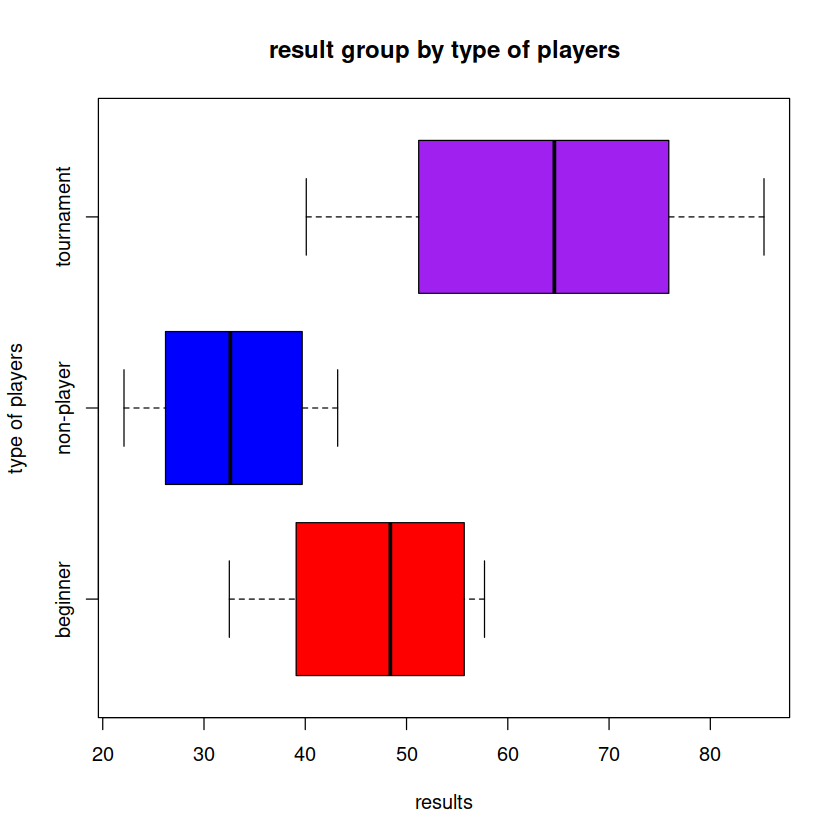

In [125]:
## boxplot
data1 %>% boxplot(res~type,data=.,col=c("red","blue","purple"),horizontal = T,xlab="results",ylab="type of players",
                 main="result group by type of players"
                 )


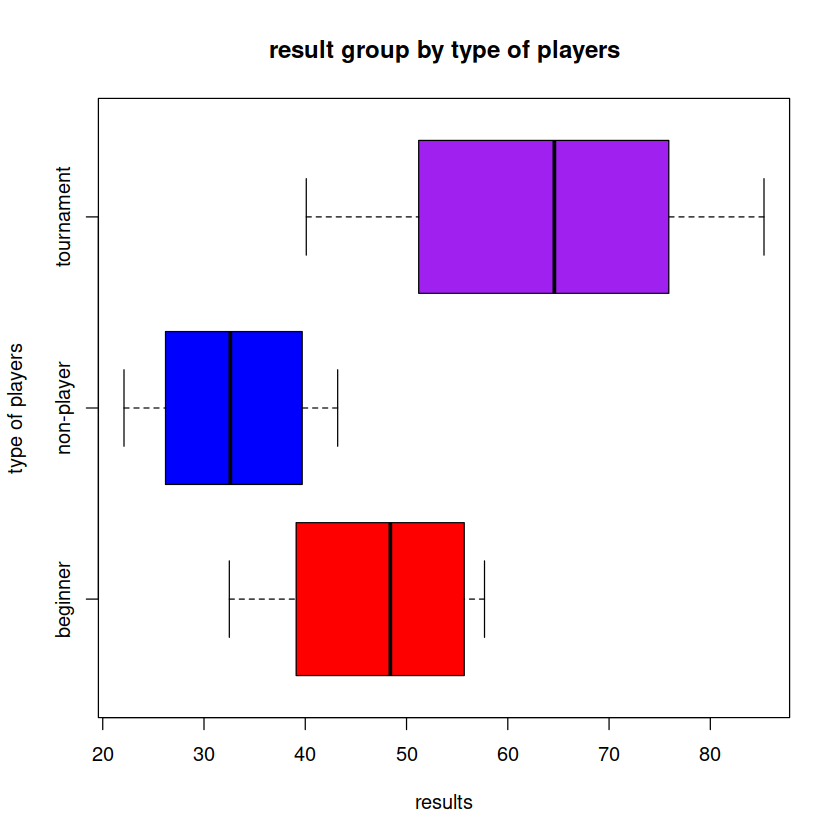

In [126]:
## another way

boxplot(data1$res~data1$type,col=c("red","blue","purple"),horizontal = T,xlab="results",ylab="type of players",
                 main="result group by type of players"
                 )

![](https://www.statology.org/wp-content/uploads/2021/01/skew7.png)

<img src="Screenshot from 2023-11-05 10-21-44.png">

<h3 style="color:green;text-align:center">Exercise 7</h3>

Exercise 3.1 from Heumann, Schomaker: Introduction to Statistics and
Data Analysis, page 63
A hiking entusiast has a app for his smartphone which summarizes his
hikes by using a GPS device. The distance hiked (in km) and maximum
altitude (in m) for the last 10 hikes:
+ Distance | 12.5 29.9 14.8 18.7 7.6 16.2 16.5 27.4 12.1 17.5
+ Altitude | 342 1245 502 555 398 670 796 912 238 466

In [127]:
dis<-c(12.5 ,29.9, 14.8 ,18.7, 7.6, 16.2, 16.5, 27.4, 12.1, 17.5)
alt<-c(342, 1245 ,502, 555, 398, 670, 796, 912, 238, 466)

+ Calculate the arithmetic mean and median for both distance and
  altitude.

In [128]:
mean(dis)

[1] 17.32

In [129]:
mean(alt)

[1] 612.4

In [130]:
median(dis)

[1] 16.35

In [131]:
median(alt)

[1] 528.5

+ Calculate the interquartile range and standard deviation for both
   variables. Compare the variability of both variables.


In [133]:
q1_dis=quantile(dis,p=0.25,type=7)
q3_dis=quantile(dis,p=0.75,type=7)
IQR=q3_dis-q1_dis
IQR

75% 
5.325

In [135]:
q1_alt=quantile(alt,p=0.25,type=7)
q3_alt=quantile(dis,p=0.75,type=7)
IQR=q3_alt-q1_alt
IQR

75% 
-396.6

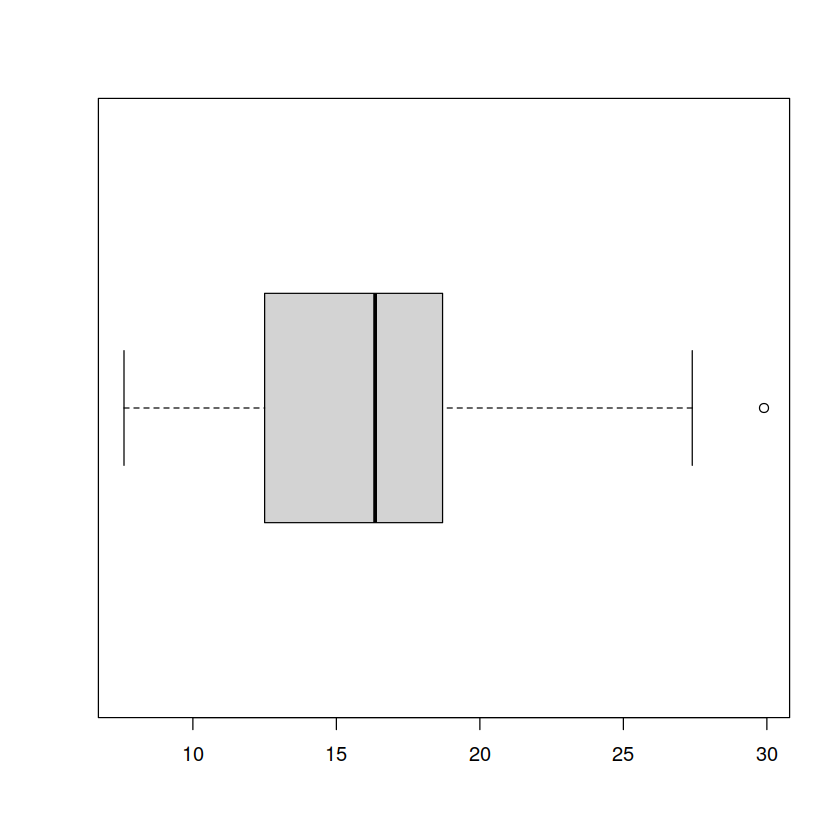

In [137]:
boxplot(dis,horizontal = T)

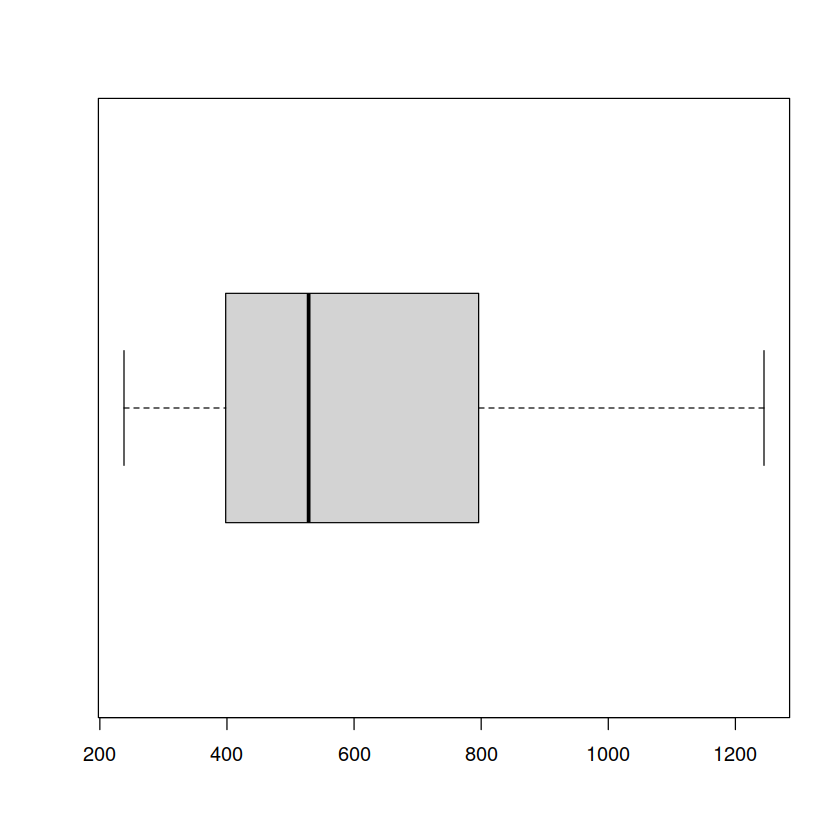

In [138]:
boxplot(alt,horizontal = T)

<h3 style="color:green;text-align:center">Exercise 8</h3>

 The data set mpg of the ggplot package contains a subset of the fuel
economy data that the EPA makes available on http://fueleconomy.gov.
It contains only models which had a new release every year between
1999 and 2008 - this was used as a proxy for the popularity of the car.


+ Inspect the description of the data set using the ?mpg() command.


In [140]:
install.packages("ggplot2")
library("ggplot2")

Installing package into ‘/home/jrana/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [145]:
mpg %>% select(hwy,displ) ->df
df

hwy,displ
<int>,<dbl>
29,1.8
29,1.8
31,2.0
30,2.0
26,2.8
26,2.8
27,3.1
26,1.8
25,1.8


+ Select only the variables displ (engine displacement) and hwy
  (highway miles per gallon) from the data set. Group the values of the variable displ into the the groups “low” (1    displ <
  3), “medium” (3 ≤ displ < 5) and “big” (5 ≤ displ < 8). Use the cut() command to do this. Add a column displ class which
  denotes the belonging to one of the groups

In [150]:
bounds<-c(1,3,5,8)

displ_class<-cut(df$displ,breaks=bounds,labels=c("low","medium","big"))
displ_class

[1] low    low    low    low    low    low    medium low    low    low   
 [11] low    low    low    medium medium low    medium medium big    big   
 [21] big    big    big    big    big    big    big    big    big    big   
 [31] big    big    low    low    medium medium medium low    low    medium
 [41] medium medium medium medium medium medium medium medium medium medium
 [51] medium medium medium medium medium big    big    medium medium medium
 [61] medium big    big    big    medium medium medium medium medium medium
 [71] big    big    big    big    medium big    big    medium medium medium
 [81] medium medium medium medium medium medium medium medium big    big   
 [91] medium medium medium medium medium medium medium medium big    low   
[101] low    low    low    low    low    low    low    low    low    low   
[111] low    low    low    low    medium low    low    low    low    low   
[121] low    low    low    medium medium medium medium medium big    big   
[131] medium medium medium medium big    big    big    medium medium medium
[141] medium low    low    low    low    medium medium low    low    medium
[151] medium medium medium big    medium medium medium medium big    low   
[161] low    low    low    low    low    low    low    low    low    low   
[171] low    low    low    low    low    medium medium medium medium low   
[181] low    low    low    low    low    medium low    low    low    low   
[191] low    low    medium low    low    low    low    low    medium big   
[201] low    low    low    medium medium medium medium low    low    low   
[211] low    low    low    low    low    low    low    low    low    low   
[221] low    low    low    low    low    low    low    low    low    low   
[231] low    low    low    medium
Levels: low medium big

In [154]:
df %>% mutate(displ_class=displ_class) ->df
df

hwy,displ,displ_class
<int>,<dbl>,<fct>
29,1.8,low
29,1.8,low
31,2.0,low
30,2.0,low
26,2.8,low
26,2.8,low
27,3.1,medium
26,1.8,low
25,1.8,low


+ Calculate the mean, minimum, maximum and the three quartile of
  the variable hwy depending on the values of displ and depending
   on displ class.


In [155]:
df %>% group_by(displ) %>% summarise(
    
        mean=mean(hwy),
        median=median(hwy),
        max=max(hwy),
        min=min(hwy),
        q1=quantile(hwy,p=0.25,type=7),
        q2=quantile(hwy,p=0.5,type=7),
        q3=quantile(hwy,p=0.75,type=7),
        IQR=q3-q1

) 

displ,mean,median,max,min,q1,q2,q3,IQR
<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1.6,31.60000,32.0,33,29,32.00,32.0,32.00,0.00
1.8,31.64286,31.5,37,25,29.00,31.5,35.00,6.00
1.9,43.00000,44.0,44,41,42.50,44.0,44.00,1.50
2.0,28.23810,29.0,31,26,27.00,29.0,29.00,2.00
2.2,27.33333,27.0,29,26,26.25,27.0,28.50,2.25
2.4,28.84615,30.0,31,24,27.00,30.0,31.00,4.00
2.5,26.80000,26.0,32,23,25.00,26.0,28.25,3.25
2.7,21.75000,21.0,24,20,20.00,21.0,24.00,4.00
2.8,24.90000,25.0,26,23,24.00,25.0,26.00,2.00


In [156]:
df %>% group_by(displ_class) %>% summarise(
    
        mean=mean(hwy),
        median=median(hwy),
        max=max(hwy),
        min=min(hwy),
        q1=quantile(hwy,p=0.25,type=7),
        q2=quantile(hwy,p=0.5,type=7),
        q3=quantile(hwy,p=0.75,type=7),
        IQR=q3-q1

) 

displ_class,mean,median,max,min,q1,q2,q3,IQR
<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
low,27.98148,27,44,20,26.00,27,29.00,3.0
medium,20.11111,19,29,12,17.00,19,24.00,7.0
big,18.13889,17,26,14,15.75,17,19.25,3.5


+ Draw boxplots of the variable hwy grouped by displ resp. displ class
  and interpret the results.

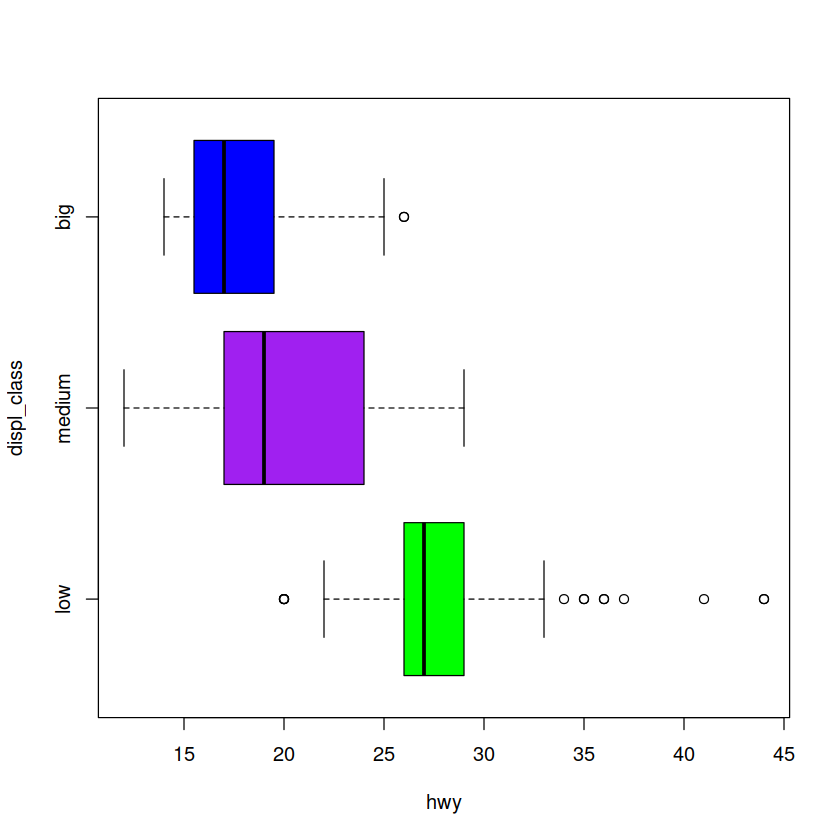

In [157]:
df %>% boxplot(hwy~displ_class,data=.,col=c("green","purple","blue"),horizontal = T)

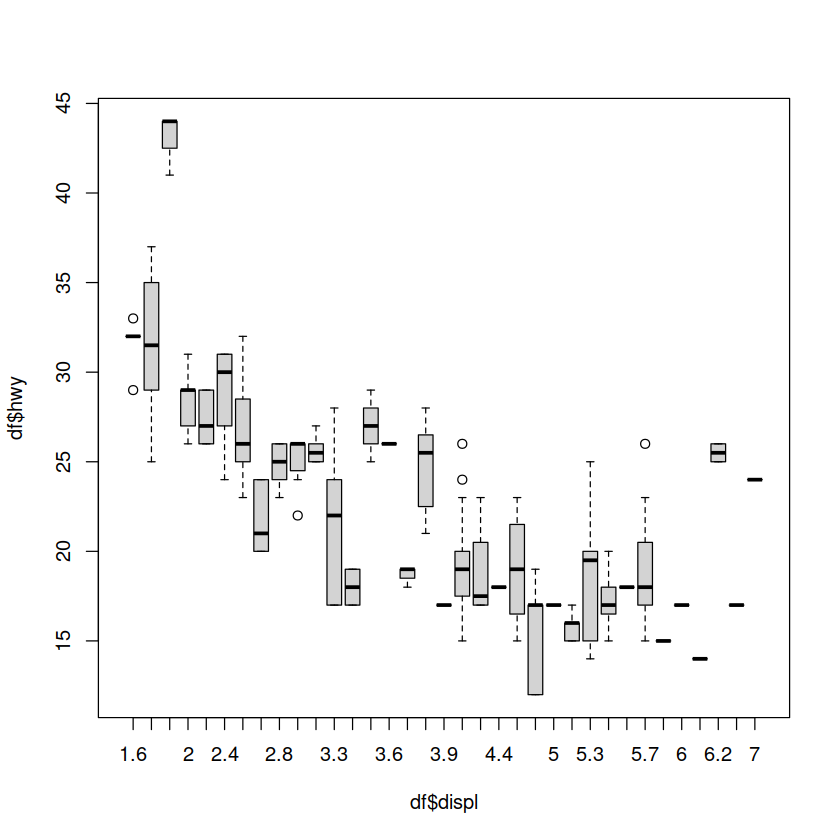

In [158]:
boxplot(df$hwy~df$displ)